In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime

In [2]:
df_ = pd.read_excel("Book2.xlsx", sheet_name="son6")
df = df_.copy()

In [3]:
df.head()

,Order_ID,Order_Date,Customer_ID,State,Product_ID,Product_Name,Quantity,Price
0,CA-2017-126221,2017-12-30,CC-12430,Indiana,OFF-AP-10002457,Eureka The Boss Plus 12-Amp Hard Box Upright V...,2,104.650
1,CA-2017-143259,2017-12-30,PO-18865,New York,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",4,80.784
2,CA-2017-143259,2017-12-30,PO-18865,New York,TEC-PH-10004774,Gear Head AU3700S Headset,7,12.990
3,CA-2017-143259,2017-12-30,PO-18865,New York,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,3,17.592
4,CA-2017-115427,2017-12-30,EB-13975,California,OFF-BI-10002103,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2,4.345


In [4]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'State', 'Product_ID',
       'Product_Name', 'Quantity', 'Price'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [6]:
df.isnull().sum()

Order_ID        0
Order_Date      0
Customer_ID     0
State           0
Product_ID      0
Product_Name    0
Quantity        0
Price           0
dtype: int64

In [7]:
df.describe()

,Order_Date,Quantity,Price
count,9994,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355392,3.789574,79.299495
min,2014-01-03 00:00:00,1.000000,0.120000
25%,2015-05-23 00:00:00,2.000000,5.184000
50%,2016-06-26 00:00:00,3.000000,16.208800
75%,2017-05-14 00:00:00,5.000000,66.653333
max,2017-12-30 00:00:00,14.000000,6354.950000
std,NaN,2.225110,222.749520


In [8]:
df.dtypes

Order_ID                object
Order_Date      datetime64[ns]
Customer_ID             object
State                   object
Product_ID              object
Product_Name            object
Quantity                 int64
Price                  float64
dtype: object

In [9]:
df["State"].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada  

In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [11]:
df.head()

,Order_ID,Order_Date,Customer_ID,State,Product_ID,Product_Name,Quantity,Price
0,CA-2017-126221,2017-12-30,CC-12430,Indiana,OFF-AP-10002457,Eureka The Boss Plus 12-Amp Hard Box Upright V...,2,104.650
1,CA-2017-143259,2017-12-30,PO-18865,New York,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",4,80.784
2,CA-2017-143259,2017-12-30,PO-18865,New York,TEC-PH-10004774,Gear Head AU3700S Headset,7,12.990
3,CA-2017-143259,2017-12-30,PO-18865,New York,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,3,17.592
4,CA-2017-115427,2017-12-30,EB-13975,California,OFF-BI-10002103,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2,4.345


In [12]:
order_id = df.groupby("Product_ID").agg({"Quantity":"sum"}).sort_values(by="Quantity", ascending=False).reset_index()
order_id

,Product_ID,Quantity
0,OFF-FA-10003485,215
1,OFF-EN-10004773,170
2,OFF-PA-10002764,150
3,OFF-AR-10004707,86
4,FUR-TA-10001039,74
...,...,...
1843,FUR-BO-10002206,1
1844,TEC-MA-10003493,1
1845,OFF-PA-10000048,1
1846,FUR-CH-10002317,1


In [13]:
order_id.iloc[0, 0]
type(order_id)

pandas.core.frame.DataFrame

In [14]:
max_orderIDs = df[df["Product_ID"] == order_id.iloc[0, 0]]["Order_ID"] #En fazla satılan ürüne ait Order_ID'ler

In [15]:
df["State"].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada  

In [16]:
#df1 = df[df["Order_ID"].isin(max_orderIDs)]
df1 = df[df["State"] == "California"]

In [17]:
df1.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'State', 'Product_ID',
       'Product_Name', 'Quantity', 'Price'],
      dtype='object')

In [18]:
#df1 = df[df["State"] == "New York"]

In [19]:
df1.head()

,Order_ID,Order_Date,Customer_ID,State,Product_ID,Product_Name,Quantity,Price
4,CA-2017-115427,2017-12-30,EB-13975,California,OFF-BI-10002103,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2,4.3450
5,CA-2017-115427,2017-12-30,EB-13975,California,OFF-AZ-10004632,GBC Binding covers,2,10.3600
7,CA-2017-118885,2017-12-29,JG-15160,California,FUR-CH-10002880,"Global High-Back Leather Tilter, Burgundy",4,276.7275
8,CA-2017-118885,2017-12-29,JG-15160,California,TEC-PH-10002563,Adtran 1202752G1,3,100.7920
11,CA-2017-146626,2017-12-29,BP-11185,California,FUR-FU-10002501,Nu-Dell Executive Frame,8,7.9000


In [20]:
df1.describe()

,Order_Date,Quantity,Price
count,2001,2001.000000,2001.000000
mean,2016-05-03 01:28:30.944527616,3.831584,73.348028
min,2014-01-06 00:00:00,1.000000,0.123750
25%,2015-05-03 00:00:00,2.000000,5.448000
50%,2016-07-04 00:00:00,3.000000,16.680000
75%,2017-05-02 00:00:00,5.000000,67.840000
max,2017-12-30 00:00:00,14.000000,6354.950000
std,NaN,2.280158,213.503583


In [21]:
df1.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'State', 'Product_ID',
       'Product_Name', 'Quantity', 'Price'],
      dtype='object')

In [22]:
df1.dtypes

Order_ID                object
Order_Date      datetime64[ns]
Customer_ID             object
State                   object
Product_ID              object
Product_Name            object
Quantity                 int64
Price                  float64
dtype: object

In [23]:
basket = pd.pivot_table(data=df1, index="Order_ID", columns="Product_ID", values="Quantity", aggfunc="count", fill_value=0)

In [24]:
basket.head()

Product_ID,FUR-AY-10001473,FUR-AY-10002213,FUR-AY-10004091,FUR-AY-10004270,FUR-AY-10004848,FUR-AZ-10001146,FUR-AZ-10001473,FUR-AZ-10002213,FUR-AZ-10004017,FUR-AZ-10004864,...,TEC-PH-10004586,TEC-PH-10004614,TEC-PH-10004667,TEC-PH-10004700,TEC-PH-10004774,TEC-PH-10004833,TEC-PH-10004896,TEC-PH-10004908,TEC-PH-10004922,TEC-PH-10004977
Order_ID,,,,,,,,,,,,,,,,,,,,,
CA-2014-100090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2014-100860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2014-100867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CA-2014-101462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2014-101931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
basket.tail()

Product_ID,FUR-AY-10001473,FUR-AY-10002213,FUR-AY-10004091,FUR-AY-10004270,FUR-AY-10004848,FUR-AZ-10001146,FUR-AZ-10001473,FUR-AZ-10002213,FUR-AZ-10004017,FUR-AZ-10004864,...,TEC-PH-10004586,TEC-PH-10004614,TEC-PH-10004667,TEC-PH-10004700,TEC-PH-10004774,TEC-PH-10004833,TEC-PH-10004896,TEC-PH-10004908,TEC-PH-10004922,TEC-PH-10004977
Order_ID,,,,,,,,,,,,,,,,,,,,,
US-2017-160143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-163300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-163657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-163790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-167318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
basket.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
basket= basket.astype(bool)

In [28]:
print(basket.dtypes)

Product_ID
FUR-AY-10001473    bool
FUR-AY-10002213    bool
FUR-AY-10004091    bool
FUR-AY-10004270    bool
FUR-AY-10004848    bool
                   ... 
TEC-PH-10004833    bool
TEC-PH-10004896    bool
TEC-PH-10004908    bool
TEC-PH-10004922    bool
TEC-PH-10004977    bool
Length: 1195, dtype: object


In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
df2 = apriori(basket, min_support=0.005, use_colnames = True)

In [31]:
df2.head()

,support,itemsets
0,0.005877,(FUR-BO-10001337)
1,0.005877,(FUR-CH-10002774)
2,0.005877,(OFF-AP-10004249)
3,0.005877,(OFF-EN-10004773)
4,0.006856,(OFF-FA-10003485)


In [32]:
association_rules(df2, metric = "confidence", min_threshold = 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [33]:
df2.values

array([[0.005876591576885406, frozenset({'FUR-BO-10001337'})],
       [0.005876591576885406, frozenset({'FUR-CH-10002774'})],
       [0.005876591576885406, frozenset({'OFF-AP-10004249'})],
       [0.005876591576885406, frozenset({'OFF-EN-10004773'})],
       [0.0068560235063663075, frozenset({'OFF-FA-10003485'})],
       [0.005876591576885406, frozenset({'OFF-PA-10002764'})]],
      dtype=object)

In [34]:
df2.tail(30)

,support,itemsets
0,0.005877,(FUR-BO-10001337)
1,0.005877,(FUR-CH-10002774)
2,0.005877,(OFF-AP-10004249)
3,0.005877,(OFF-EN-10004773)
4,0.006856,(OFF-FA-10003485)
5,0.005877,(OFF-PA-10002764)


In [35]:
df2["itemsets"].value_counts()

itemsets
(FUR-BO-10001337)    1
(FUR-CH-10002774)    1
(OFF-AP-10004249)    1
(OFF-EN-10004773)    1
(OFF-FA-10003485)    1
(OFF-PA-10002764)    1
Name: count, dtype: int64

In [36]:
df2[df2["support"]> 0.03]

,support,itemsets


In [37]:
df2["itemsets"] = df2["itemsets"].astype(str)

In [38]:
df3 = df2["itemsets"].str.strip('()').str.split(', ', expand=True)

In [39]:
df3.columns

RangeIndex(start=0, stop=1, step=1)

In [40]:
df2.to_csv("df2son.csv")

In [41]:
df4 = pd.read_excel("Book2.xlsx", sheet_name="Sheet4")

In [42]:
#df4.to_csv("retail.csv")

<Axes: xlabel='Price'>

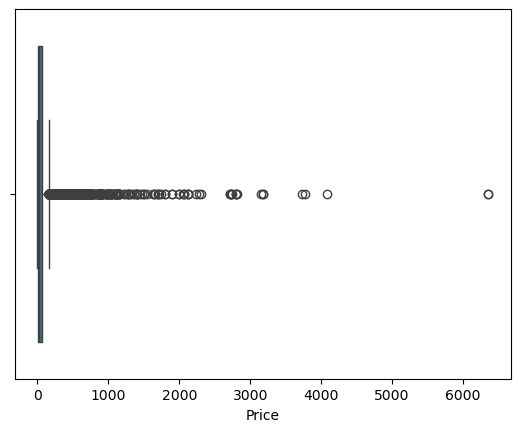

In [43]:
sns.boxplot(x="Price",data=df)